### 根据问题2，以一个配送点为例

In [46]:
from audioop import cross
from re import X
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import matplotlib as mpl
# 贝叶斯优化
from bayes_opt import BayesianOptimization
mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['font.serif'] = ['KaiTi']

# 配送点序号
k = 0

In [47]:
data_1 = pd.read_excel('./配送点和管理小区汇总.xlsx', sheet_name=0, usecols=['小区人口数（人）', '小区横坐标', '小区纵坐标', '配送点序号']).values
# 第一个配送点管辖的小区
data_2 = data_1[np.where(data_1 == k)[0], :-1]
data_2

array([[1209.  ,   55.35,   34.11],
       [1785.  ,   56.21,   31.9 ],
       [ 847.  ,   54.56,   30.49],
       [5487.  ,   55.24,   30.42],
       [1949.  ,   54.7 ,   30.88],
       [ 190.  ,   54.77,   31.6 ],
       [ 509.  ,   55.55,   32.11],
       [ 535.  ,   55.16,   31.52],
       [3996.  ,   61.09,   28.24],
       [3593.  ,   61.07,   28.92],
       [2589.  ,   58.72,   29.45],
       [8874.  ,   58.25,   26.51],
       [3389.  ,   59.  ,   31.38],
       [4166.  ,   57.55,   29.74],
       [2179.  ,   61.26,   29.96],
       [3011.  ,   58.54,   28.32],
       [1026.  ,   59.51,   28.52],
       [2015.  ,   60.74,   30.61],
       [1180.  ,   59.01,   28.75],
       [1354.  ,   57.72,   28.93],
       [1631.  ,   56.85,   30.66],
       [1206.  ,   56.93,   31.78],
       [ 366.  ,   59.75,   30.18],
       [2038.  ,   56.35,   33.75],
       [ 129.  ,   59.21,   30.48],
       [ 329.  ,   58.28,   29.87],
       [1370.  ,   57.45,   30.38],
       [ 762.  ,   60.2 ,   

In [48]:
data_3 = pd.read_excel('./配送点和管理小区汇总.xlsx', sheet_name=1, usecols=['配送点x', '配送点y']).values
# 配送点坐标
pei_pos = data_3[k].reshape(1, -1)
renshu = [[0]]
pei_pos = np.hstack((renshu, pei_pos))
# 合并坐标数据
data_4 = np.vstack((pei_pos, data_2))
data_4

array([[   0.  ,   57.92,   30.32],
       [1209.  ,   55.35,   34.11],
       [1785.  ,   56.21,   31.9 ],
       [ 847.  ,   54.56,   30.49],
       [5487.  ,   55.24,   30.42],
       [1949.  ,   54.7 ,   30.88],
       [ 190.  ,   54.77,   31.6 ],
       [ 509.  ,   55.55,   32.11],
       [ 535.  ,   55.16,   31.52],
       [3996.  ,   61.09,   28.24],
       [3593.  ,   61.07,   28.92],
       [2589.  ,   58.72,   29.45],
       [8874.  ,   58.25,   26.51],
       [3389.  ,   59.  ,   31.38],
       [4166.  ,   57.55,   29.74],
       [2179.  ,   61.26,   29.96],
       [3011.  ,   58.54,   28.32],
       [1026.  ,   59.51,   28.52],
       [2015.  ,   60.74,   30.61],
       [1180.  ,   59.01,   28.75],
       [1354.  ,   57.72,   28.93],
       [1631.  ,   56.85,   30.66],
       [1206.  ,   56.93,   31.78],
       [ 366.  ,   59.75,   30.18],
       [2038.  ,   56.35,   33.75],
       [ 129.  ,   59.21,   30.48],
       [ 329.  ,   58.28,   29.87],
       [1370.  ,   57.45,   

In [49]:
from scipy import spatial
import matplotlib.pyplot as plt
distance_matrix = spatial.distance.cdist(data_4[:, 1:], data_4[:, 1:], metric='euclidean')
distance_matrix


array([[0.        , 4.57919207, 2.32819673, ..., 2.08173005, 0.920489  ,
        2.14553024],
       [4.57919207, 0.        , 2.37143417, ..., 5.7980169 , 4.16111764,
        6.58316793],
       [2.32819673, 2.37143417, 0.        , ..., 3.98136911, 1.7933767 ,
        4.22511538],
       ...,
       [2.08173005, 5.7980169 , 3.98136911, ..., 0.        , 2.99821614,
        2.9747773 ],
       [0.920489  , 4.16111764, 1.7933767 , ..., 2.99821614, 0.        ,
        2.43528232],
       [2.14553024, 6.58316793, 4.22511538, ..., 2.9747773 , 2.43528232,
        0.        ]])

In [50]:
num_points = data_4.shape[0]

# 定义问题
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    sum_length = 0
    sum_cost = 0
    for i in range(num_points):
        sum_length = sum_length + distance_matrix[routine[i], routine[(i + 1) % num_points]]
        sum_cost = sum_cost + (sum_length*data_4[routine[(i + 1) % num_points], 0]/10000)
    return sum_cost

# 模拟退火算法
from sko.SA import SA_TSP 
# 蚁群算法
from sko.ACA import ACA_TSP

sa_tsp = ACA_TSP(func=cal_total_distance, n_dim=num_points,
	          size_pop=50, max_iter=200,
    	      distance_matrix=distance_matrix)
best_points, best_distance = sa_tsp.run()
print(best_points, best_distance, cal_total_distance(best_points))

[ 0 27 32 21 14 26 11 19 16 33 12  9 10 15 18 28 31 23 25 13 30 24  1  2
  7  8  6  5  3  4 22 29 20 17] 90.94830092579177 90.94830092579177


Text(0.5, 1.0, '蚁群优化算法')

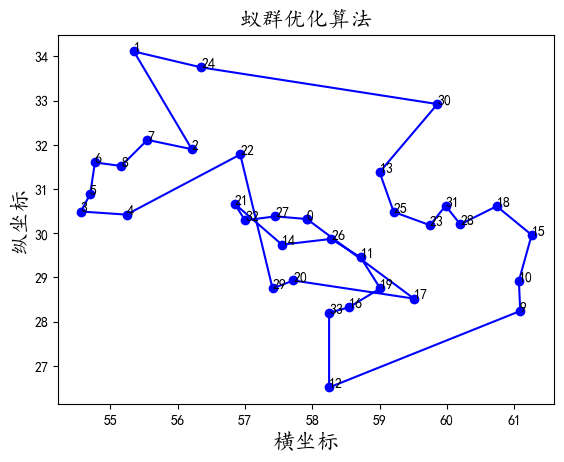

In [67]:
import networkx as nx
# 新建有向图
plt.figure()
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = data_4[best_points_, 1:]
plt.plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-b')
for i in range(len(best_points)):
    plt.text(data_4[best_points[i], 1], data_4[best_points[i], 2], str(best_points[i]))
plt.xlabel('横坐标', fontsize=16)
plt.ylabel('纵坐标', fontsize=16)
plt.title('蚁群优化算法', fontsize=16)
